# Business Case

The aim in this project is to build a machine learning model that will help the company to determine ex post if a buyer will be satisfy of its purchase or not.The stakeholders have engaged the analytics team to look for insights on transaction data as well as buyers’ feedback on whether they are satisfied with their purchases.
This project will alow stackholders to take corective action before the purchase happened to ensure high buyers' satisfaction, reduce the return rate and them maximize the revenue.
The buyers in this case are dealerships (instead of final consumers in retail). 

# Methodologies

### Machine Learning (ML)

ML is a subfield of computer science that gives “computers the ability to learn without being explicitly programmed”. 
It consists of teaching computers to solve problems by looking at hundredth cases, learning from them and using that experience to solve the same problems in the future.
There are two type of ML models: Supervised and Unsupervised ML. The main difference between both is that supervised learning deals with labeled data while unsupervised learning deals with unlabeled data.
In this case, the data are labelled so we use supervised learning models.

### Classification models

Supervised learning can use regression analysis when the predictive variable is continuous or classification models to predict categorical and discrete variables.
As our aim in this case is to predict if a buyer will be satify or not, we will use classification models here: Random Forest classifier, Decision tree classifier, k-nearest neighbors and Support Vector Machine.

# Data Exploration and Transformation

To perform our analysis, we were provided with one year of transactions data. 
The buyers generally use car year, odometer, and "car_score" to assess the quality of the cars and the price they’re willing to pay
at auction. “Car score” is an algorithmic score based on the car’s condition (exterior, interior, frame, mechanical, tires, etc.)

In [17]:
# import librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#import the dataset
df=pd.read_csv("C:/Users/djema/OneDrive/Desktop/Tableau/Case Study Buyer Satisfaction data.csv")

In [19]:
df.head()

,TransactionID,PurchaseDate,AdditionalService,ChannelType,SaleType,CarYear,CarOdometer,CarScore,Price,BuyerFeedback,CarScore_Cleaned,Unnamed: 11,Unnamed: 12
0,56244,1/2/2018,N,Hybrid,Regular,2014,34088,86.0,14450,Satisfied,86,NaN,NaN
1,45043,1/2/2018,N,Hybrid,Regular,2012,88799,84.0,10710,Satisfied,84,NaN,NaN
2,47033,1/2/2018,N,Hybrid,Regular,2015,43772,82.0,16320,Satisfied,82,NaN,Mode CarScore
3,4959,1/2/2018,N,Hybrid,Regular,2011,104539,54.0,14238,Satisfied,54,NaN,92
4,9704,1/2/2018,N,Hybrid,Regular,2009,73714,74.0,13940,Satisfied,74,NaN,NaN


In [20]:
#dropping columns, 10 11 and 12
df.drop(["CarScore_Cleaned", "Unnamed: 11", "Unnamed: 12"], axis=1, inplace=True)

In [21]:
df.head()

,TransactionID,PurchaseDate,AdditionalService,ChannelType,SaleType,CarYear,CarOdometer,CarScore,Price,BuyerFeedback
0,56244,1/2/2018,N,Hybrid,Regular,2014,34088,86.0,14450,Satisfied
1,45043,1/2/2018,N,Hybrid,Regular,2012,88799,84.0,10710,Satisfied
2,47033,1/2/2018,N,Hybrid,Regular,2015,43772,82.0,16320,Satisfied
3,4959,1/2/2018,N,Hybrid,Regular,2011,104539,54.0,14238,Satisfied
4,9704,1/2/2018,N,Hybrid,Regular,2009,73714,74.0,13940,Satisfied


In [22]:
#dropping "TransactionID"
df.drop(["TransactionID", "PurchaseDate"], axis=1, inplace=True)

In [23]:
df.head()

,AdditionalService,ChannelType,SaleType,CarYear,CarOdometer,CarScore,Price,BuyerFeedback
0,N,Hybrid,Regular,2014,34088,86.0,14450,Satisfied
1,N,Hybrid,Regular,2012,88799,84.0,10710,Satisfied
2,N,Hybrid,Regular,2015,43772,82.0,16320,Satisfied
3,N,Hybrid,Regular,2011,104539,54.0,14238,Satisfied
4,N,Hybrid,Regular,2009,73714,74.0,13940,Satisfied


In [24]:
df.shape

(17200, 8)

In [25]:
df.columns

Index(['AdditionalService', 'ChannelType', 'SaleType', 'CarYear',
       'CarOdometer', 'CarScore', 'Price', 'BuyerFeedback'],
      dtype='object')

In [26]:
#checking data types
df.dtypes

AdditionalService     object
ChannelType           object
SaleType              object
CarYear                int64
CarOdometer            int64
CarScore             float64
Price                  int64
BuyerFeedback         object
dtype: object

In [27]:
#checking for nulls
df.isnull().sum()

AdditionalService       0
ChannelType             0
SaleType                0
CarYear                 0
CarOdometer             0
CarScore             2757
Price                   0
BuyerFeedback           0
dtype: int64

C:\Users\djema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CarScore'>

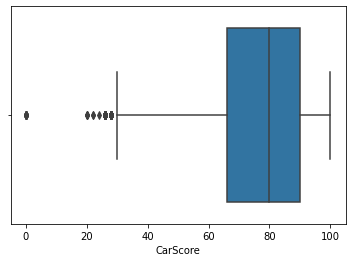

In [28]:
# choosing between mean, mode, median to replace null values in CarScore
sns.boxplot(df.CarScore)


The distribution of CarScore is very skee to the right with outliers.Outliers will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. 

In [29]:
# replacing nulls in CarScore with the mode
df['CarScore'] = df['CarScore'].fillna(df['CarScore'].mode()[0])

In [30]:
#recheking for nulls
df.isnull().sum()

AdditionalService    0
ChannelType          0
SaleType             0
CarYear              0
CarOdometer          0
CarScore             0
Price                0
BuyerFeedback        0
dtype: int64

In [31]:
# Descriptive statistics
df.describe()

,CarYear,CarOdometer,CarScore,Price
count,17200.000000,17200.000000,17200.000000,17200.000000
mean,2012.007907,66811.746105,78.358140,18950.450640
std,3.471068,44915.428412,17.096889,12530.965651
min,1998.000000,122.000000,0.000000,340.000000
25%,2010.000000,30642.000000,70.000000,9775.000000
50%,2013.000000,58751.500000,84.000000,16320.000000
75%,2014.000000,95495.750000,92.000000,25500.000000
max,2018.000000,249404.000000,100.000000,84660.000000


C:\Users\djema\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\djema\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\djema\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

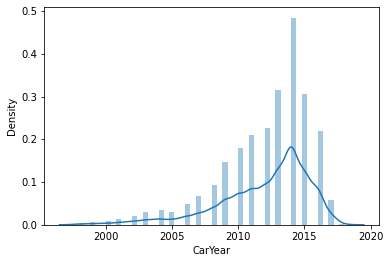

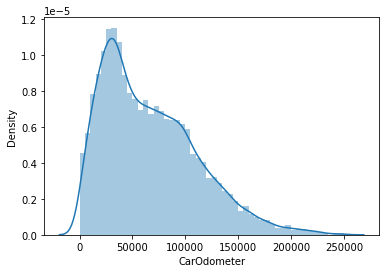

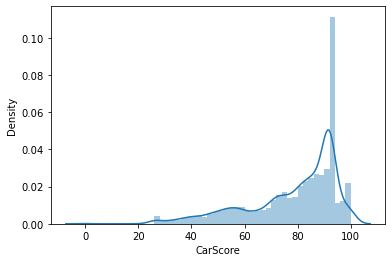

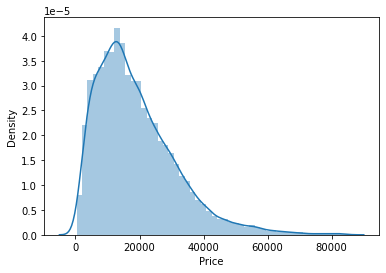

In [32]:
#checking for variables distribution
columns = ['CarYear', 'CarOdometer', 'CarScore', 'Price']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

#### Descriptive statistics for categorical variables

In [38]:
ChannelType_counts = df['ChannelType'].value_counts().to_frame()
ChannelType_counts

,ChannelType
Hybrid,10684
Digital,3701
Pyhsical,2815


In [52]:
AdditionalService_counts = df['AdditionalService'].value_counts().to_frame()
AdditionalService_counts

,AdditionalService
N,14545
Y,2655


In [53]:
SaleType_counts = df['SaleType'].value_counts().to_frame()
SaleType_counts

,SaleType
Regular,14679
As-Is,2521


### Transforming Categorical Variables into Numeric Variables

In [33]:
# package import
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [34]:
df.head()

,AdditionalService,ChannelType,SaleType,CarYear,CarOdometer,CarScore,Price,BuyerFeedback
0,N,Hybrid,Regular,2014,34088,86.0,14450,Satisfied
1,N,Hybrid,Regular,2012,88799,84.0,10710,Satisfied
2,N,Hybrid,Regular,2015,43772,82.0,16320,Satisfied
3,N,Hybrid,Regular,2011,104539,54.0,14238,Satisfied
4,N,Hybrid,Regular,2009,73714,74.0,13940,Satisfied


In [36]:
# create sklearn array for label encoding
AdditionalService=df.iloc[:, 1:2].values
ChannelType=df.iloc[:, 4:5].values
SaleType = df.iloc[:, 6:7]

In [37]:
# Label encoding
le = LabelEncoder()

df["AdditionalService"] = le.fit_transform(df["AdditionalService"])
df["ChannelType"] = le.fit_transform(df["ChannelType"])
df["SaleType"] = le.fit_transform(df["SaleType"])

In [38]:
df.head()

,AdditionalService,ChannelType,SaleType,CarYear,CarOdometer,CarScore,Price,BuyerFeedback
0,0,1,1,2014,34088,86.0,14450,Satisfied
1,0,1,1,2012,88799,84.0,10710,Satisfied
2,0,1,1,2015,43772,82.0,16320,Satisfied
3,0,1,1,2011,104539,54.0,14238,Satisfied
4,0,1,1,2009,73714,74.0,13940,Satisfied


# Model Development

As we are predicting a categorical variable (Buyer's Satisfaction), the following supervised learning model will be developed:Random Forest classifier, Decision tree classifier, k-nearest neighbors. The best model will be recommendated to predicting Buyer's satifaction in the autoindustry.

### Data Preprocessing

In [39]:
X = df[['AdditionalService', 'ChannelType', 'SaleType', 'CarYear', 'CarOdometer', 'CarScore', 'Price',]].values
X[0:7]
y = df["BuyerFeedback"]
y[0:7]

0    Satisfied
1    Satisfied
2    Satisfied
3    Satisfied
4    Satisfied
5    Satisfied
6    Satisfied
Name: BuyerFeedback, dtype: object

In [40]:
# splitting data into test and training tests
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print('Shape of X training set{}'.format(X_trainset.shape), '&', 'Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X testing set {}'.format(X_testset.shape), '&', 'Size of Y tresting set{}'.format(y_testset.shape))

Shape of X training set(12040, 7) & Size of Y training set (12040,)
Shape of X testing set (5160, 7) & Size of Y tresting set(5160,)


### Decision Tree Modelling

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
#Prediction
predTree = DT.predict(X_testset)

In [45]:
# measuring accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9767441860465116


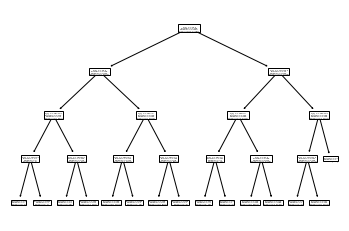

In [46]:
from sklearn import tree
tree.plot_tree(DT)
plt.show()

### k-nearest neighbors (KNN) Modelling

KNN is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainset,y_trainset)

KNeighborsClassifier()

In [49]:
# knn prediction
knn_Pred = knn.predict(X_testset)

In [53]:
# knn prediction evaluation
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, knn_Pred))

Test set Accuracy:  0.9777131782945736


### Random Forest classifier

Random Forest is a classifier that contains a number of decision trees on various subsets of the
given dataset and takes the average to improve the predictive accuracy of that dataset.For classification tasks, the output of the random forest is the class selected by most trees.

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_trainset,y_trainset)

RandomForestClassifier()

In [56]:
# RFC prediction
rfc_pred = rfc.predict(X_testset)

In [59]:
# rfc prediction accuracy
print(" rfc Test set Accuracy: ", metrics.accuracy_score(rfc_pred, y_testset))

 rfc Test set Accuracy:  0.9777131782945736


### Model Evaluation : f1_score

F1-score is one of the most important evaluation metrics in machine learning. It elegantly sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall. Precision measures how many positives are really positives among all positive predictions.
Recall measures among all real positive cases, how many are predicted positive.

In [64]:
# f1_score
from sklearn.metrics import f1_score
print("f1 score is for DecisionTree ", f1_score(y_testset, predTree, average='weighted'))
print("f1 score is for KNN ", f1_score(y_testset, knn_Pred, average='weighted'))
print("f1 score is for RandomForest ", f1_score(y_testset, rfc_pred, average='weighted'))

f1 score is for DecisionTree  0.966573772211471
f1 score is for KNN  0.966695342380426
f1 score is for RandomForest  0.966695342380426


# Conclusion

The aim in this project is to build a machine learning model that will help the company to determine ex post if a buyer will be satisfy of its purchase or not. Our analysis shows that machine learning model will accuretly predict car buyer's satifaction. With accuracy rates and f1_scores all above 96%, either of the classification models built above will be very effective.Implementing such a model will allow the company to increase buyers' satisfaction, increase customer retention, reduce returns and then increase revenue. Nevertheless, the addition of important cars performance determinants like Make and Model could improve the accuracy of the models.